In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels import graphics
from statsmodels.graphics.api import abline_plot
import collections

# Statistics for Experimental Design and Analysis in HCI
Bruce Liu (xingyuliu@ucla.edu)

### Why Statistcal Analysis?
- To produce valid, meaningful and defensive experiment results 
- To prove correlation, interaction or dependency between varaibles
- To formally test a hypothesis and reach conclusion


<img src="img/flow.png" width="400"/>

### How is this used in HCI research?
- Test if interface A is statistical significantly better than interface B
- Detect interaction effects between two factors
- Evaluate how each factor/feature contribute to users' subjective ratings
- Formally prove if raters/crowdworkers agree with each other
- ...

### Be careful!
- You should think about what statistical tests you will use when you think about the experimental design.
- Keep experiments and thus statistical tests simple.
- Think about data type (ratio/interval vs. ordinal/nominal). More info: [Types of Data](https://yatani.jp/teaching/doku.php?id=hcistats:datatype)


## 0. Useful Tools for Statistical Analysis
### 0.1 Languages
- R
- Python

### 0.2 Packages
- [pandas](https://pandas.pydata.org/): fast, powerful, flexible and easy to use open source data analysis and manipulation tool.
- [statsmodels](https://www.statsmodels.org/stable/index.html): a module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.
- [seaborn](https://seaborn.pydata.org/index.html): data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
- [scikit-learn](https://scikit-learn.org/stable/): simple and efficient tools for predictive data analysis

## 1. Commonly Used Statistical Tests

### 1.1 Null Hypothesis Significance Testing
A statistical method for testing whether the factor we are talking about has the effect on our observation. For example, a $t$ test or an $ANOVA$ test for comparing the means, a $t$ test in regression models to check if the predictor is significant, etc. The most common statistical testing used in HCI.

**The general procedure:**
1. Choose a model (and corresponding test) that is a reasonable match for the data from the experiment.
2. Based on the research question, develop the first statistical hypothesis, called the null hypothesis ($H_0$).
3. Develop another hypothesis, called the alternative hypothesis ($H_1$).
4. Decide the level of statistical significance (usually 0.05), also the probability of Type I error.
5. Run the test and determine the $p$ value, reject $H_0$ if $p<0.05$.

*What is $p$ value?*

"the probability of obtaining test results at least as extreme as the results actually observed, under the assumption that the null hypothesis is correct." -- Wikipedia

| <i></i>  |Reject $H_0$|Fail to Reject $H_0$|
|------|------|------|
|$H_0$ is True  |Type 1 Error (FP)  |TN   |
|$H_0$ is False  |TP   |Type 2 Erorr (FN)  |

$\rightarrow$ How unlikely your observations happen if you assume that the $H_0$ holds

**Note:** The Arbitrariness of Significance Level

Fisher suggested a probability of one in twenty (0.05) as a convenient cutoff level to reject the null hypothesis.

However, why is p = 0.0499 significant and p = 0.0501 is not?

### 1.2 Effect Size
$p$ value does not give us any information about how large the effect is.
E.g. In a $t$ test, we can know whether one technique is faster than the other, but we cannot tell how large the contribution of the techniques is to the improvement of performance time (i.e., the size of the effect).

**Effect size** is the metric that indicates the magnitude of the effect caused by a factor. The effect size is independent of the sample size, and can be used as a complement to the $p$ value.

For example, Cohen's $d$ and Pearson's $r$ for a paired $t$ test. (More info: [Effect Size](https://yatani.jp/teaching/doku.php?id=hcistats:ttest))

<img src="img/effect-size.png" width="400"/>
<img src="img/effect-size2.png" width="600"/>

### 1.3 Parametric v.s Non-Parametric
- **Parametric:** must be able to assume that the population forms a normal distribution
- **Non-Parametric:** anything else. Ordinal data (e.g. results from Likert-scale questions) and non-normal data

How to check Normality?
- Draw some graphs ([seaborn histogram](https://seaborn.pydata.org/tutorial/distributions.html), [statsmodels qq plot](https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html))
- Formally, perform e.g. a one-sample Kolmogorov-Smirnov test (More info: [Kolmogorov-Smirnov Test for Normality](https://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/), [statsmodels kstest_normal](https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.kstest_normal.html?highlight=kolmogorov%20smirnov))
- Data transformation

### 1.4 What test should I use?
[Table to choose from Statistical Tests](https://www.graphpad.com/support/faqid/1790/)

<img src="img/tests-table.png" width="800"/>

**Paired vs. Unpaired:**
- Paired: differences between the same group under different scenarios (within-subject design)
- Unpaired: simply compare two unrelated groups (between-subject design)

**Other useful tests in HCI:**
- Inter-rater reliability: to which two or more raters agree. ([Percent Agreement](https://www.statisticshowto.com/inter-rater-reliability/), [Cohen's Kappa](https://www.statisticshowto.com/cohens-kappa-statistic/))
- Intra-rater reliability: the degree of agreement among repeated assesments performed by a single rater

<img src="img/kappa-interpretation.png" width="200"/>

### 1.5 Exploratory Data Analysis (EDA)
Understand the distribution of data, correlation between features, and possible assumptions of the population. Also can be used to explore insights and findings! Usually approached with plots.

***Do this before you start any test/analysis!***

<IPython.core.display.Javascript object>


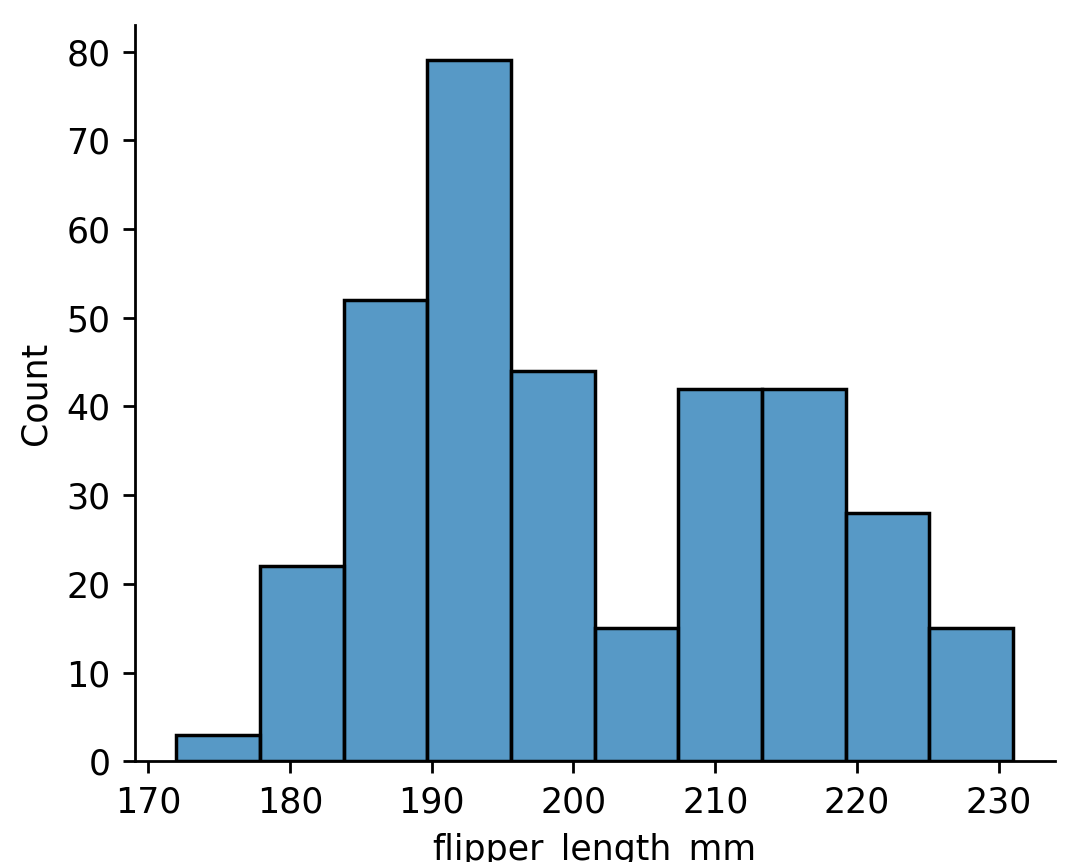

In [3]:
#Distribution of data
penguins = sns.load_dataset("penguins")
sns.displot(penguins, x="flipper_length_mm")

<IPython.core.display.Javascript object>


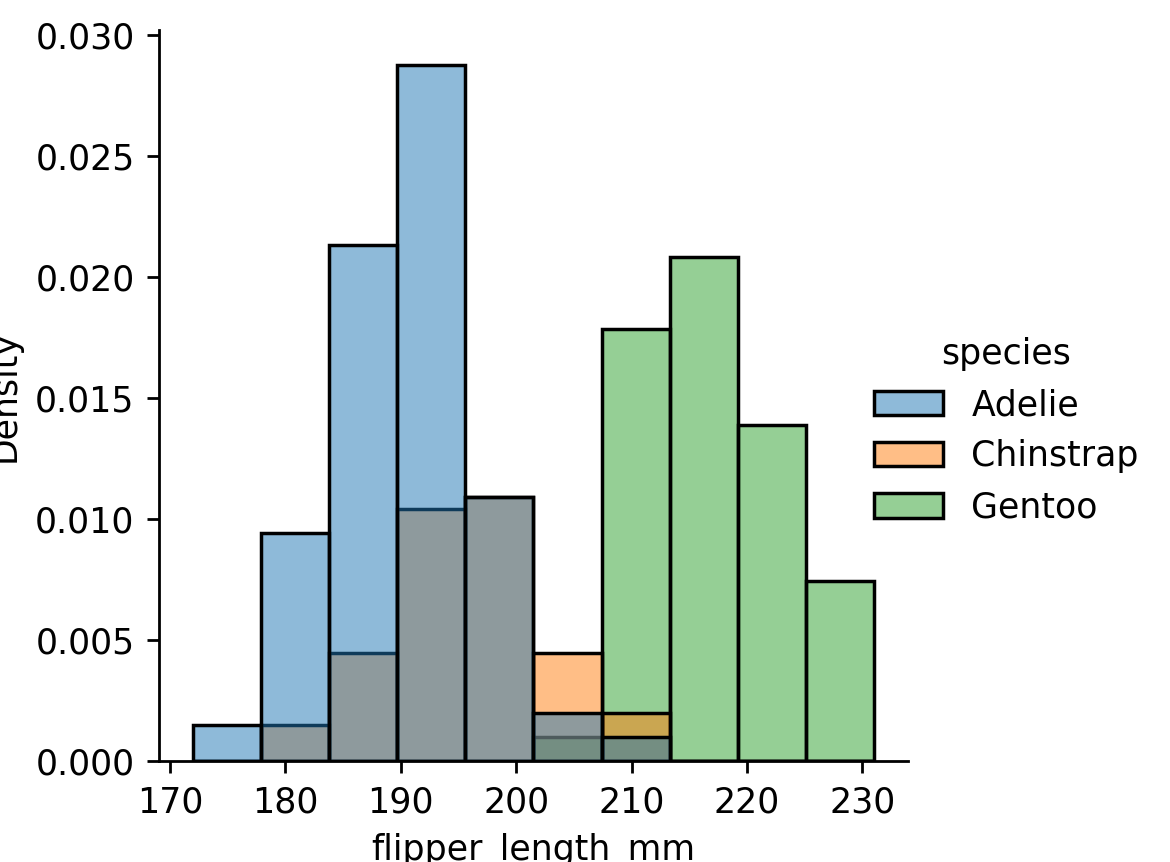

In [4]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density")

<IPython.core.display.Javascript object>


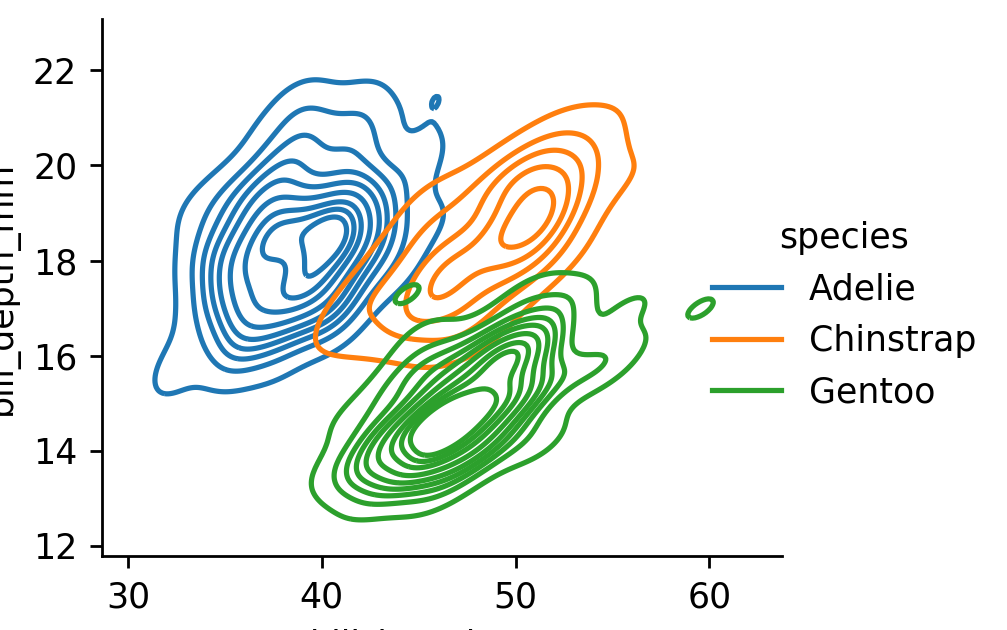

In [6]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

<IPython.core.display.Javascript object>


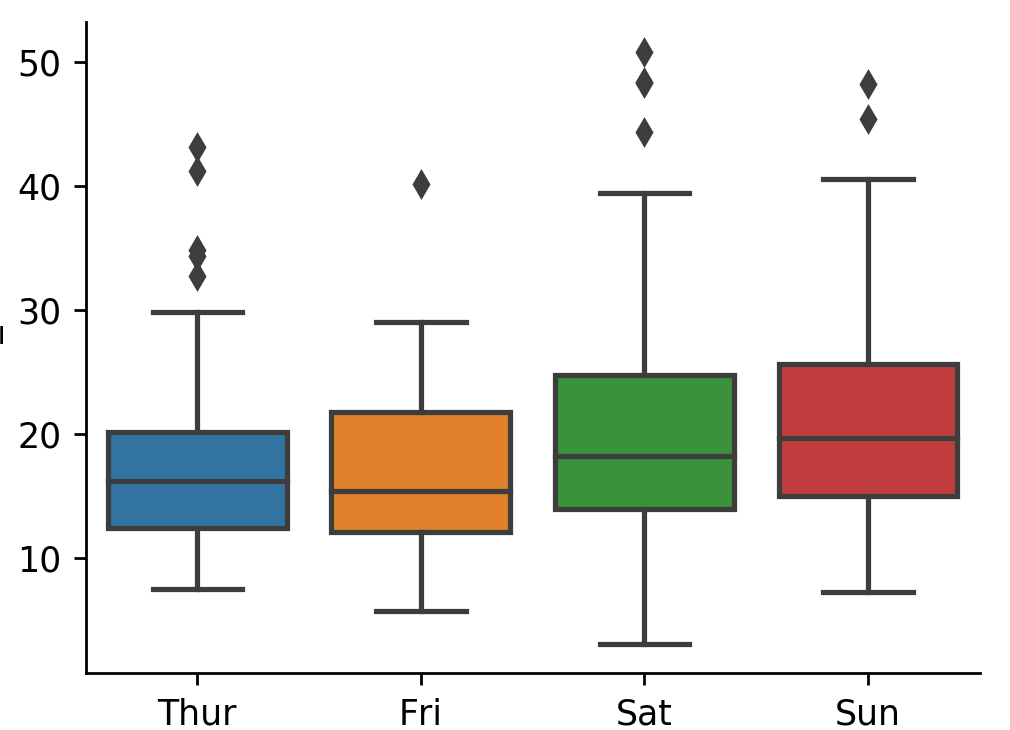

In [8]:
# Categorical Data
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", kind="box", data=tips)

<IPython.core.display.Javascript object>


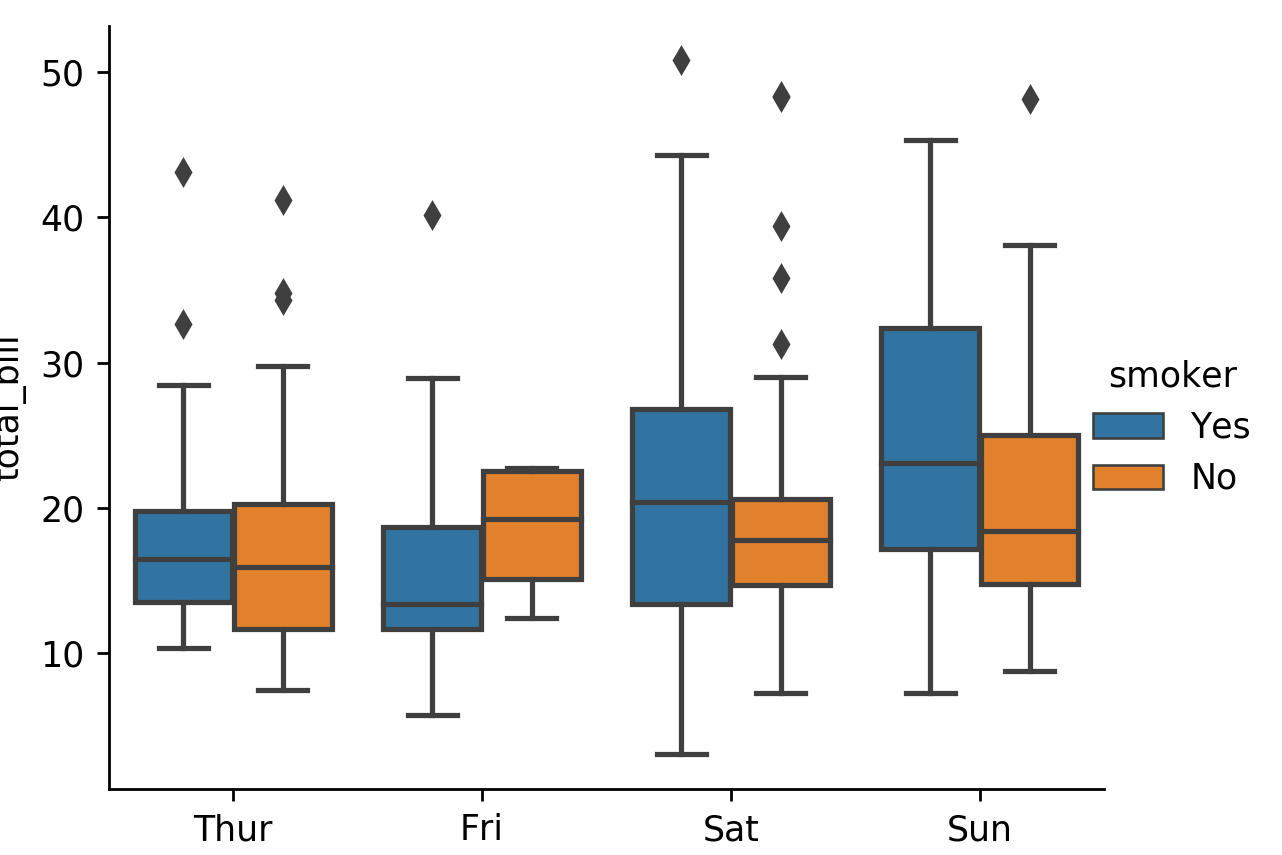

In [9]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips)

<IPython.core.display.Javascript object>


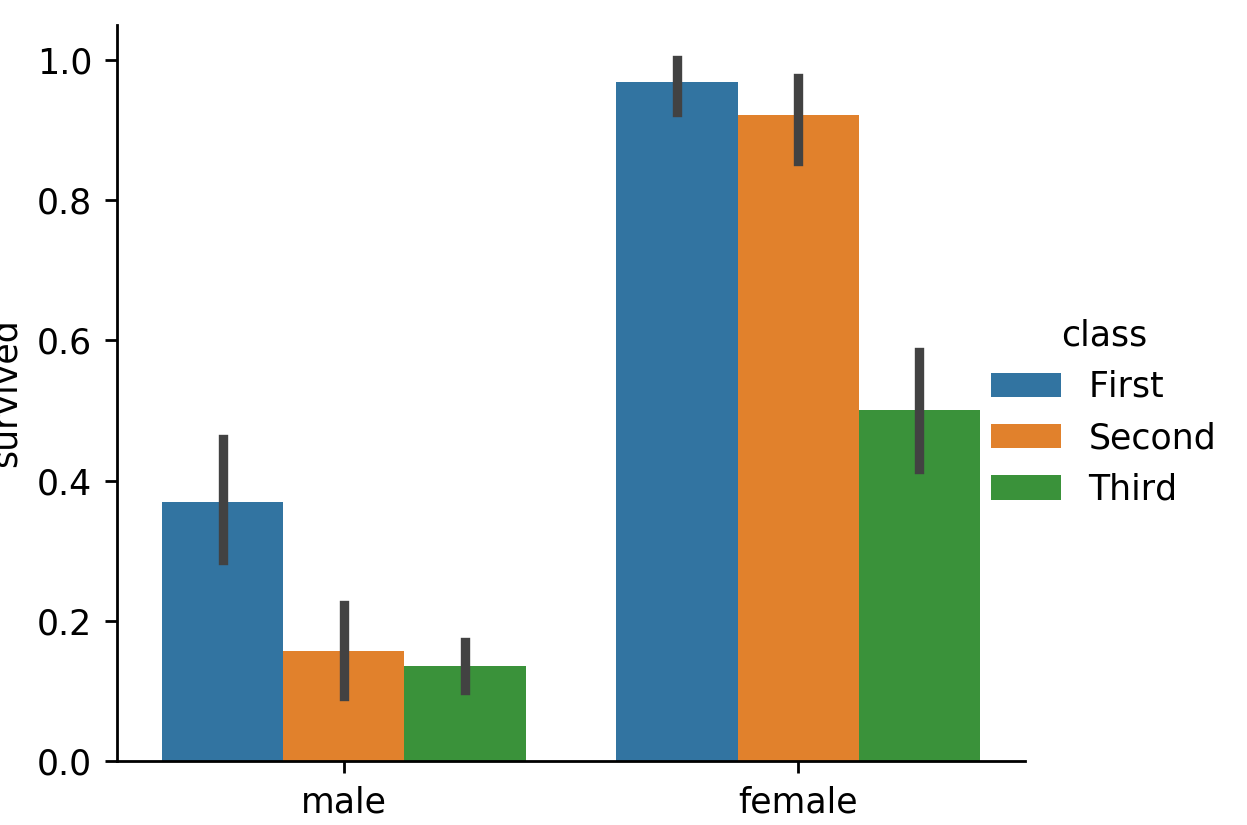

In [10]:
# Interaction
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

<IPython.core.display.Javascript object>


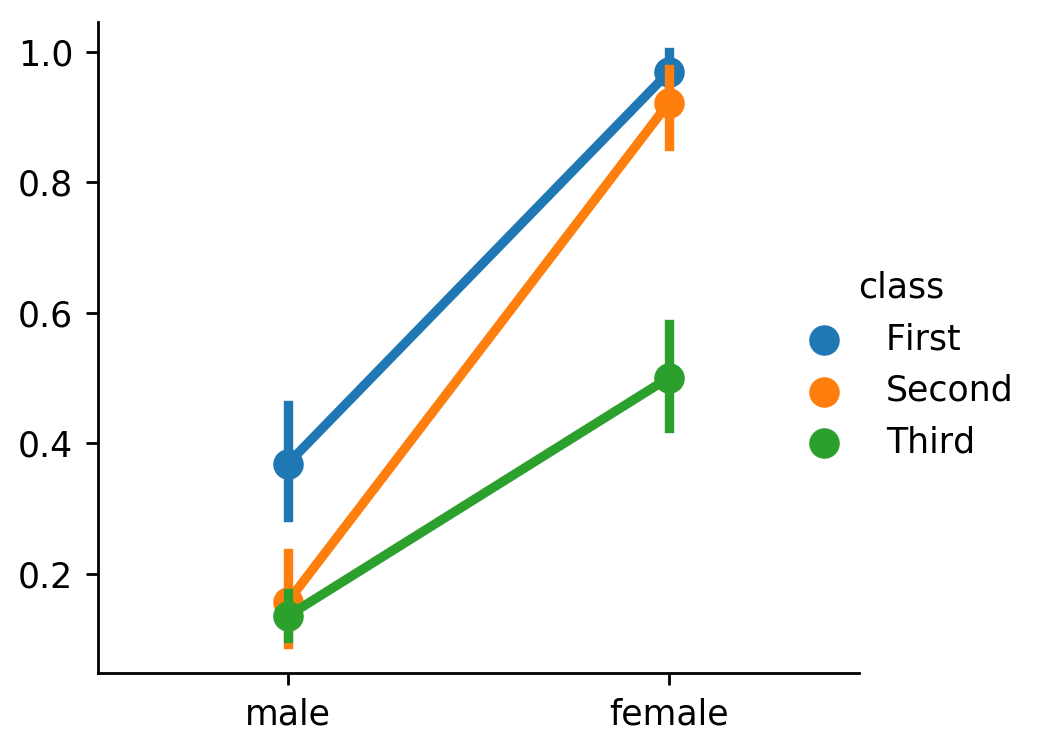

In [31]:
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic)

<IPython.core.display.Javascript object>


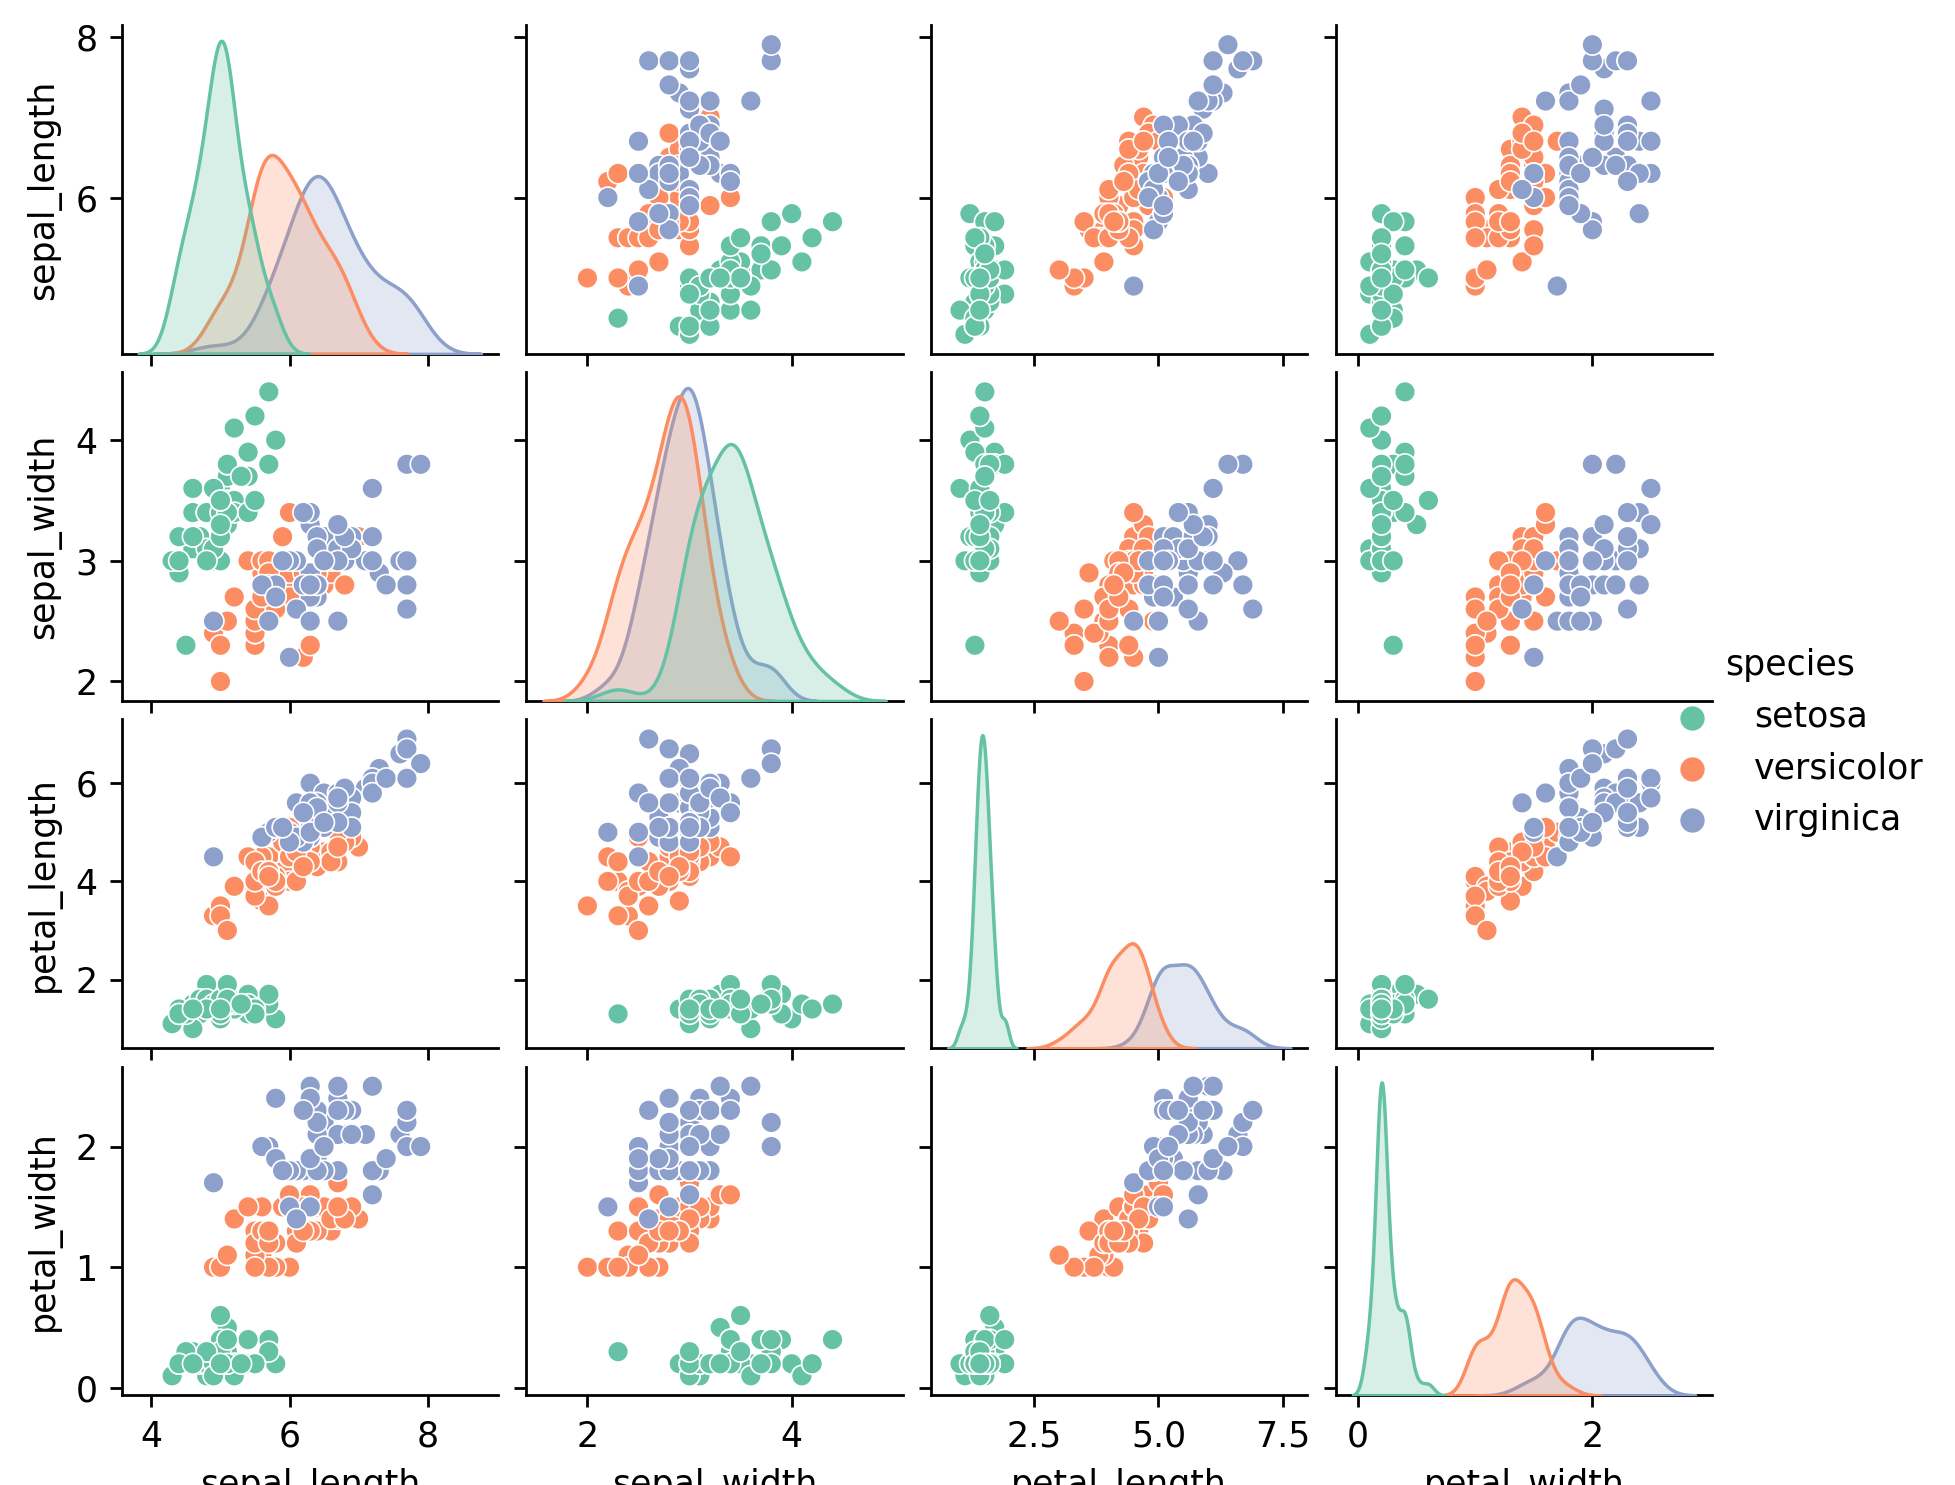

In [12]:
# Pairplots
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species", palette="Set2", diag_kind="kde", height=2.5)

## 2. Hands-on Examples

### 2.1 A/B Testing
This (fake) experiment is designed to determine which of two background colors
for computer text is easier to read, as determined by the speed with which a
task described by the text is performed. The study randomly assigns 35 university
students to one of two versions of a computer program that presents text describing
which of several icons the user should click on. The program measures how long it
takes until the correct icon is clicked. This measurement is called “reaction time”
and is measured in milliseconds (ms). The program reports the average time for
20 trials per subject. The two versions of the program differ in the background
color for the text (yellow or cyan).

In [22]:
# import data
df1 = pd.read_csv("data/ab.csv")
df1["color"] = pd.to_numeric(df1["color"])
df1.head()

,id,color,time
0,NYP,0,859
1,HDR,1,462
2,CJK,0,559
3,LYN,1,971
4,ZGQ,0,742


In [23]:
# group data
df10 = df1[df1["color"]==0]
df11 = df1[df1["color"]==1]

print(df10.shape)
print(df11.shape)

(17, 3)
(18, 3)


In [25]:
# check basic statistics
print(df10["time"].describe())
print(df11["time"].describe())

count     17.000000
mean     679.647059
std      159.386692
min      392.000000
25%      559.000000
50%      695.000000
75%      833.000000
max      906.000000
Name: time, dtype: float64
count      18.000000
mean      660.944444
std       202.038864
min       291.000000
25%       475.750000
50%       649.500000
75%       827.250000
max      1005.000000
Name: time, dtype: float64


<IPython.core.display.Javascript object>


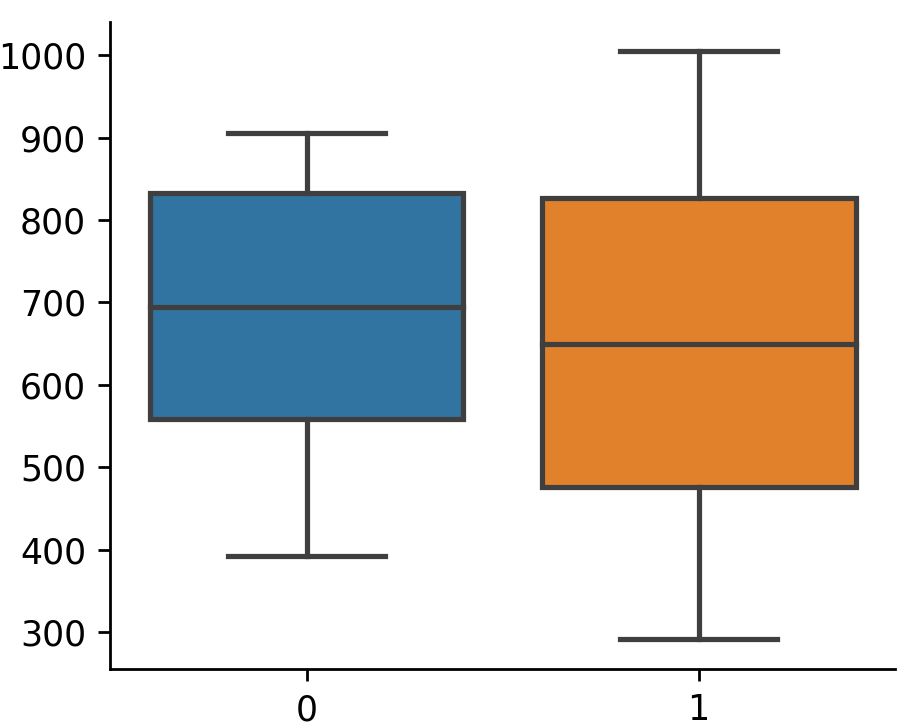

In [29]:
sns.catplot(x="color", y="time", kind="box", data=df1)

<IPython.core.display.Javascript object>


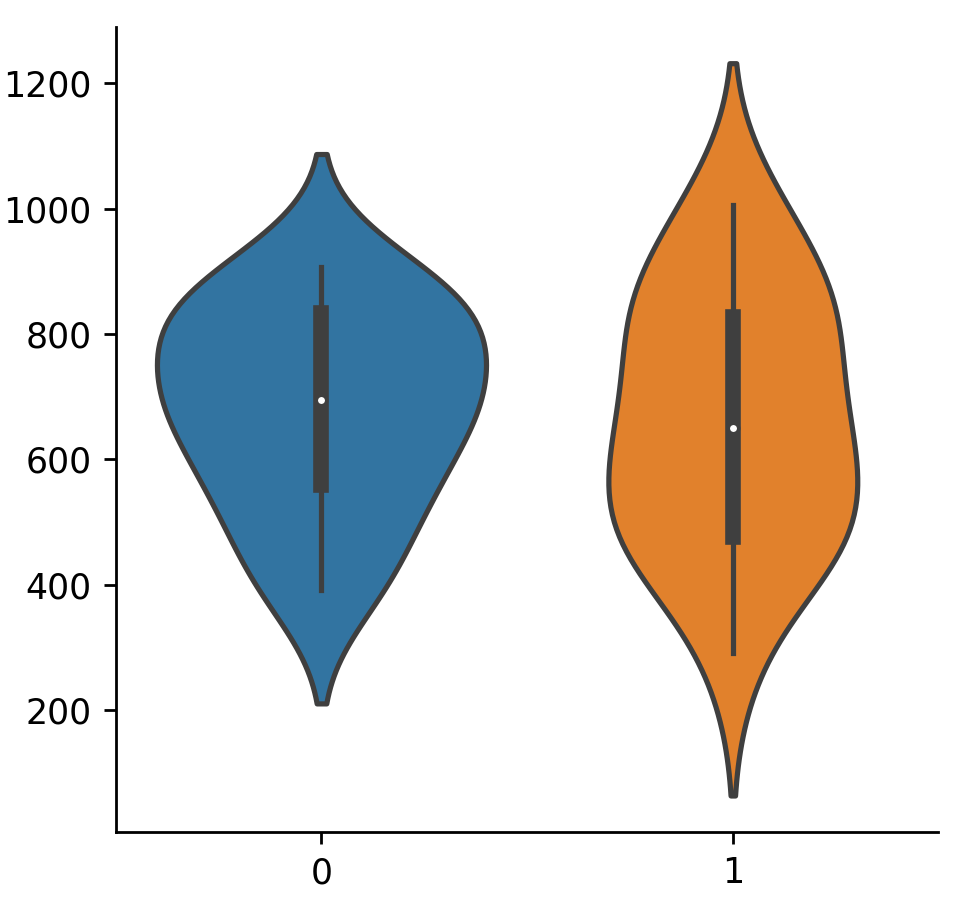

In [30]:
sns.catplot(x="color", y="time", kind="violin", data=df1)

<IPython.core.display.Javascript object>


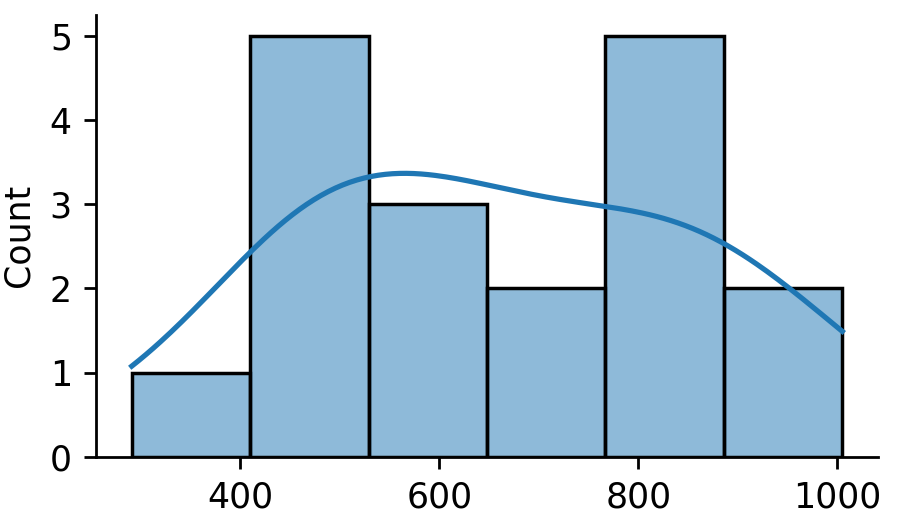

In [34]:
sns.displot(df11, x="time", kde=True)

<IPython.core.display.Javascript object>


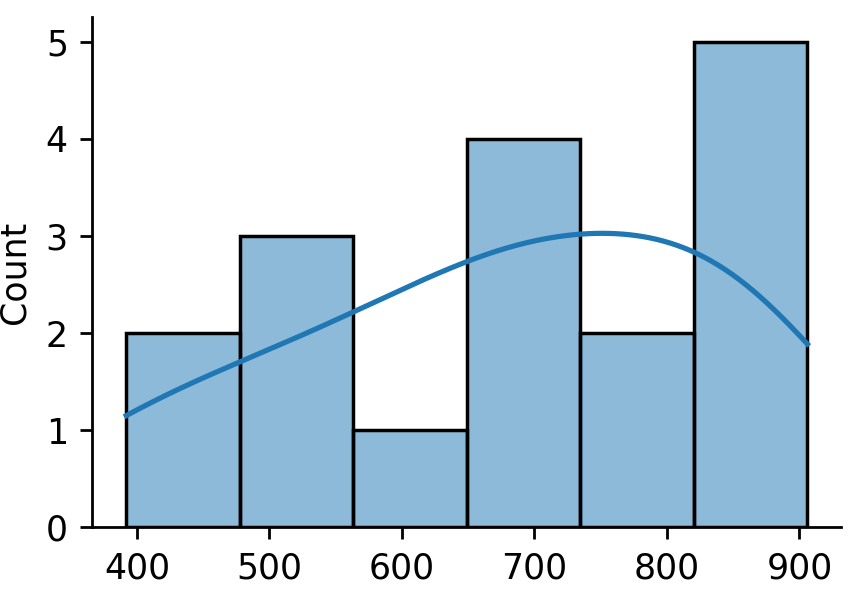

In [35]:
sns.displot(df10, x="time", kde=True)

#### RQ: Does the reaction time differ between students used the cyan background and those who used the yellow background?

*What test should we use?*

[Mann–Whitney U test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test)

$H_0$: For randomly selected values X and Y from two populations, the probability of X being greater than Y is equal to the probability of Y being greater than X <br>
$H_1$: $\neg H_0$

In [36]:
from scipy.stats import mannwhitneyu
mannwhitneyu(df10["time"], df11["time"])

MannwhitneyuResult(statistic=140.5, pvalue=0.34602051435952436)

**$\rightarrow$ We failed to reject the Null!**

### 2.2 Regression Analysis
A set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome variable') and one or more independent variables (often called 'predictors', 'covariates', or 'features') <br>
Can be used to statistically prove whether some features are significant predictors/indicators of some depedent variable.

In this task, I'll use an example of my recent research on video accessibility. Can our identified 7 heuristics: presence of speech, informative language, infrequent visual changes, simple visual content, description of visual objects, description of on screen text, and few visual references, instantiated as 7 corresponding metrics indicate video accessibility as perceived by BVI users? If so, in what proportions?

<img src="img/metrics.png" width="800"/>

In [4]:
# import data and pre-process
df = pd.read_csv("data/60_tasks.csv")
df.head()

,video,id,link,link_timestamped,topic,category,start_time,end_time,length,title,...,audio_confusing_without_visual,avg_audio_confusing_without_visual,std_audio_confusing_without_visual,1_%non_speech,2_%low_lexical_density,3_shot_per_min,4_visual_entities_per_min,5_%visual_entities_not_in_speech,6_#on_screen_text,7_#visual_ref
0,V39,QCGLegCeyjg,https://youtu.be/QCGLegCeyjg,https://www.youtube-nocookie.com/embed/QCGLegC...,Pyramid scheme,Entertainment,9,112,103,Attending a Pyramid Scheme seminar,...,"[2, 2, 2]",2.00,0.00,0.1890,0.1218,1.1650,4.0777,1.0000,0.0000,1.7476
1,V24,0WSxCOTEyQA,https://youtu.be/0WSxCOTEyQA,https://www.youtube-nocookie.com/embed/0WSxCOT...,The late show,Entertainment,0,162,162,Jon Stewart Climbs Out From Under Colbert's De...,...,"[2, 2, 2]",2.00,0.00,0.4076,0.0000,4.4444,2.5926,1.0000,3.7037,0.0000
2,V21,6V0UxqD57WI,https://youtu.be/6V0UxqD57WI,https://www.youtube-nocookie.com/embed/6V0UxqD...,UFC interview,Sports,25,88,63,UFC 246: Conor McGregor Octagon Interview,...,"[1, 2, 1]",1.33,0.47,0.2892,0.0000,3.8095,11.4286,0.8333,5.7143,0.9524
3,V27,mycFGLmK60I,https://youtu.be/mycFGLmK60I,https://www.youtube-nocookie.com/embed/mycFGLm...,Prison food taste,Entertainment,11,212,201,Prison Food Hacks Taste Test,...,"[1, 1, 3]",1.67,0.94,0.0965,0.0000,6.5672,5.0746,0.7059,2.3881,3.8806
4,V13,B0toqn0OvNA,https://youtu.be/B0toqn0OvNA,https://www.youtube-nocookie.com/embed/B0toqn0...,Reaction to trailer,Gaming,0,110,110,Fast and Furious 9 - Angry Trailer Reaction!,...,"[1, 6, 7]",4.67,2.62,0.2790,0.0047,1.0909,0.0000,1.0000,1.0909,2.1818


#### 2.2.1 EDA

count    55.000000
mean      0.217733
std       0.220318
min       0.000000
25%       0.054100
50%       0.162500
75%       0.328350
max       0.974600
Name: 1_%non_speech, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


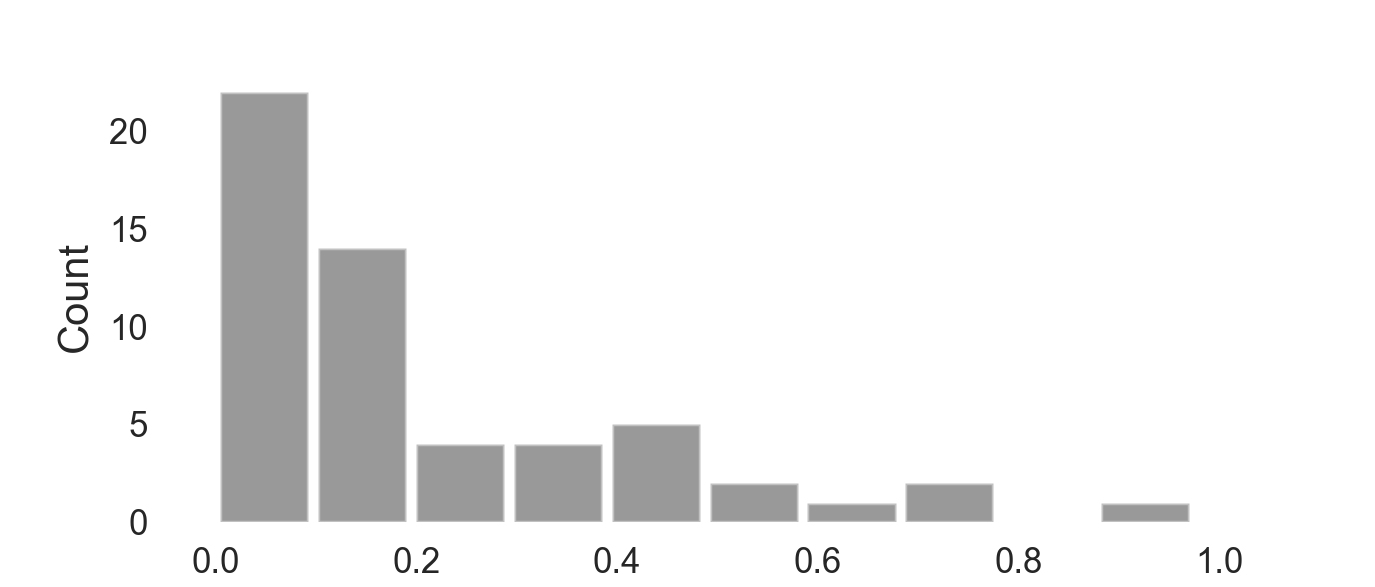

count    55.000000
mean      0.217733
std       0.220318
min       0.000000
25%       0.054100
50%       0.162500
75%       0.328350
max       0.974600
Name: 1_%non_speech, dtype: float64


In [6]:
# EDA
m1 = df["1_%non_speech"]
print(m1.describe())
# Distribution
sns.set_style("white")
sns.distplot(m1, bins=10, kde=False, hist_kws={"rwidth": .9, "color": "black"})
plt.xlabel( 'Rating', fontsize=12)
plt.ylabel( 'Count', fontsize=12)
sns.despine(left=True, bottom=True)
print(m1.describe())

#### 2.2.2 Multiple Linear Regression Model

In [10]:
import numpy as np
import statsmodels.api as sm
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [11]:
X = sm.add_constant(normalize(df[["1_%non_speech",
        "2_%low_lexical_density",
        "3_shot_per_min",
        "4_visual_entities_per_min",
        "5_%visual_entities_not_in_speech",
        "6_#on_screen_text",
        "7_#visual_ref"]]))

model = sm.OLS(df["avg_a11y_score"], X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_a11y_score   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     14.86
Date:                Fri, 06 Nov 2020   Prob (F-statistic):           4.87e-10
Time:                        17:51:20   Log-Likelihood:                -79.720
No. Observations:                  55   AIC:                             175.4
Df Residuals:                      47   BIC:                             191.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                8.2165      0.712     11.538      0.000       6.784       9.649
1_%non_speech                       -4.8519      0.802     -6.046      0.000      -6.466      -3.238
2_%low_lexical_density              -1.5802      0.705     -2.242      0.030      -2.998      -0.162
3_shot_per_min                      -1.6613      0.712     -2.332      0.024      -3.094      -0.228
4_visual_entities_per_min           -1.5263      1.079     -1.415      0.164      -3.697       0.644
5_%visual_entities_not_in_speech    -1.7809      0.784     -2.272      0.028      -3.358      -0.204
6_#on_screen_text                    1.1931      0.801      1.490      0.143      -0.417       2.804
7_#visual_ref                       -2.0923      0.754     -2.775      0.008      -3.609      -0.576
==============================================================================
Omnibus:                        7.375   Durbin-Watson:                   2.278
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                6.493
Skew:                          -0.710   Prob(JB):                       0.0389
Kurtosis:                       3.903   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Showing the result in the paper:***
<img src="img/regression_result.png" width="600"/>

#### 2.2.3 Multiple Linear Regression Assumptions [More info](https://en.wikiversity.org/wiki/Multiple_linear_regression/Assumptions)
- (1) No Multicollinearity — we computed the correlation matrix of our independent variables and all magnitudes of correlation coefficients are less than 0.4 (✓)
- (2) Homoscedasticity — we plotted a scatter plot of residuals versus predicted values of our model, residuals were centered around 0, and no clear pattern was found. The variance of error terms are similar across different values (✓)
- (3) Multivariate Normality — we plotted the normal Q-Q plot of residuals and the points show high linearity. The residuals are normally distributed (✓) 

<IPython.core.display.Javascript object>


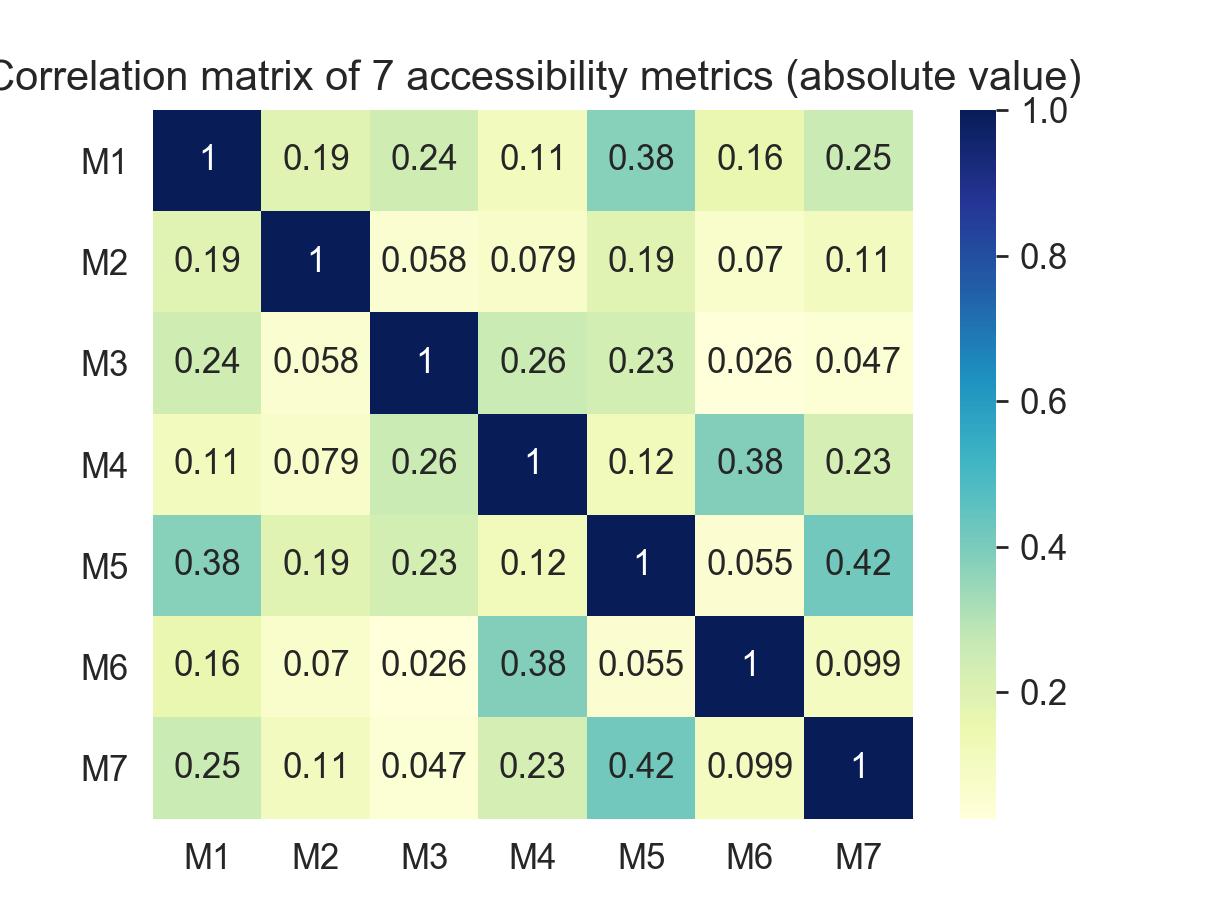

Text(0.5, 1, 'Correlation matrix of 7 accessibility metrics (absolute value)')

In [7]:
# Multicollinearity
multi_correlations = round(df[["1_%non_speech",
                                "2_%low_lexical_density",
                                "3_shot_per_min",
                                "4_visual_entities_per_min",
                                "5_%visual_entities_not_in_speech",
                                "6_#on_screen_text",
                                "7_#visual_ref"]].corr(), 4)

sns.heatmap(abs(multi_correlations), annot=True, cmap="YlGnBu")
plt.xticks(np.arange(0.5,7.5), ('M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7'), rotation=0)
plt.yticks(np.arange(0.5,7.5), ('M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7'))
plt.title('Correlation matrix of 7 accessibility metrics (absolute value)', fontsize=12)

<IPython.core.display.Javascript object>


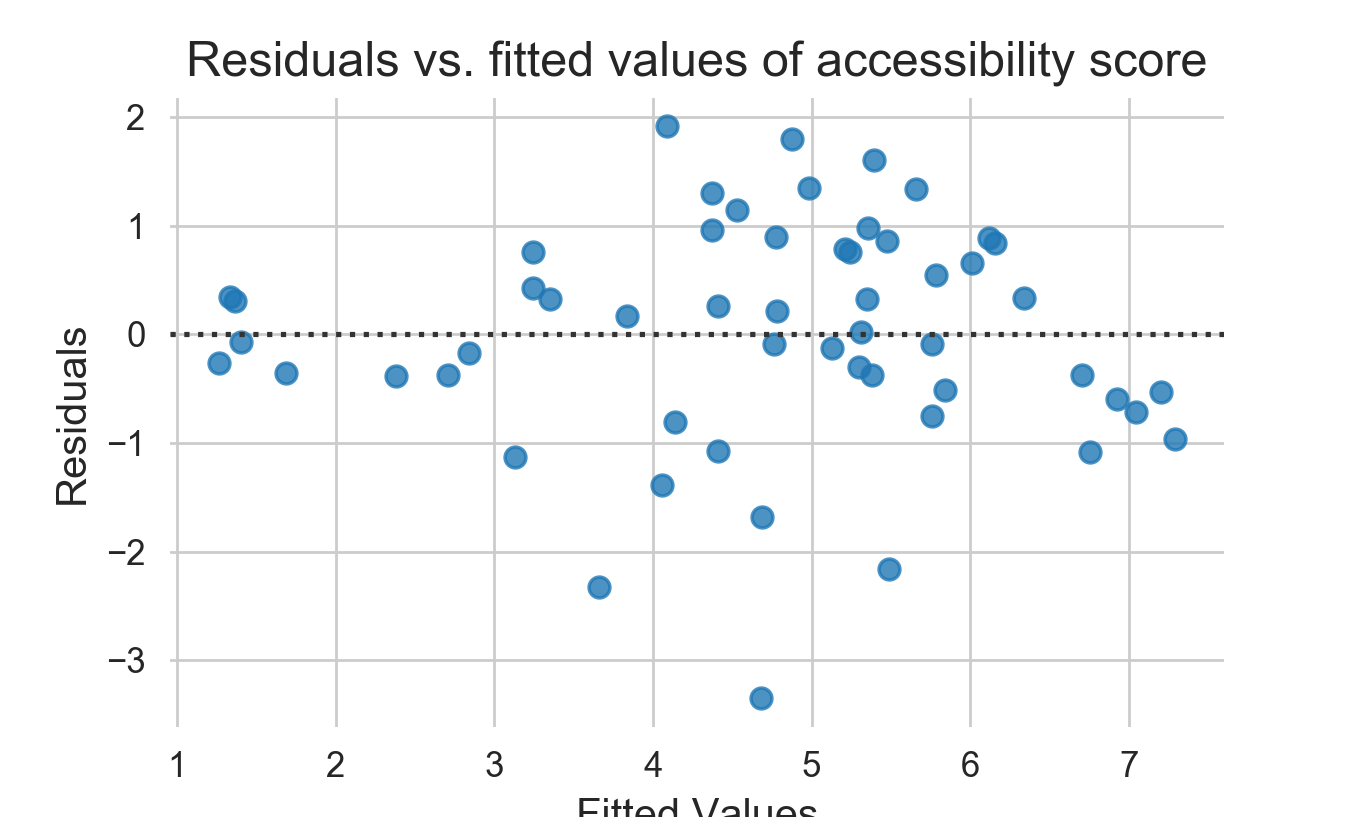

In [13]:
# Homoscedasticity
sns.set_style("whitegrid")
y_pred = results.predict()
resids = results.resid
sns.residplot(x=y_pred, y=resids)
plt.xlabel('Fitted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residuals vs. fitted values of accessibility score', fontsize=14)
sns.despine(left=True, bottom=True)
plt.show()

<IPython.core.display.Javascript object>


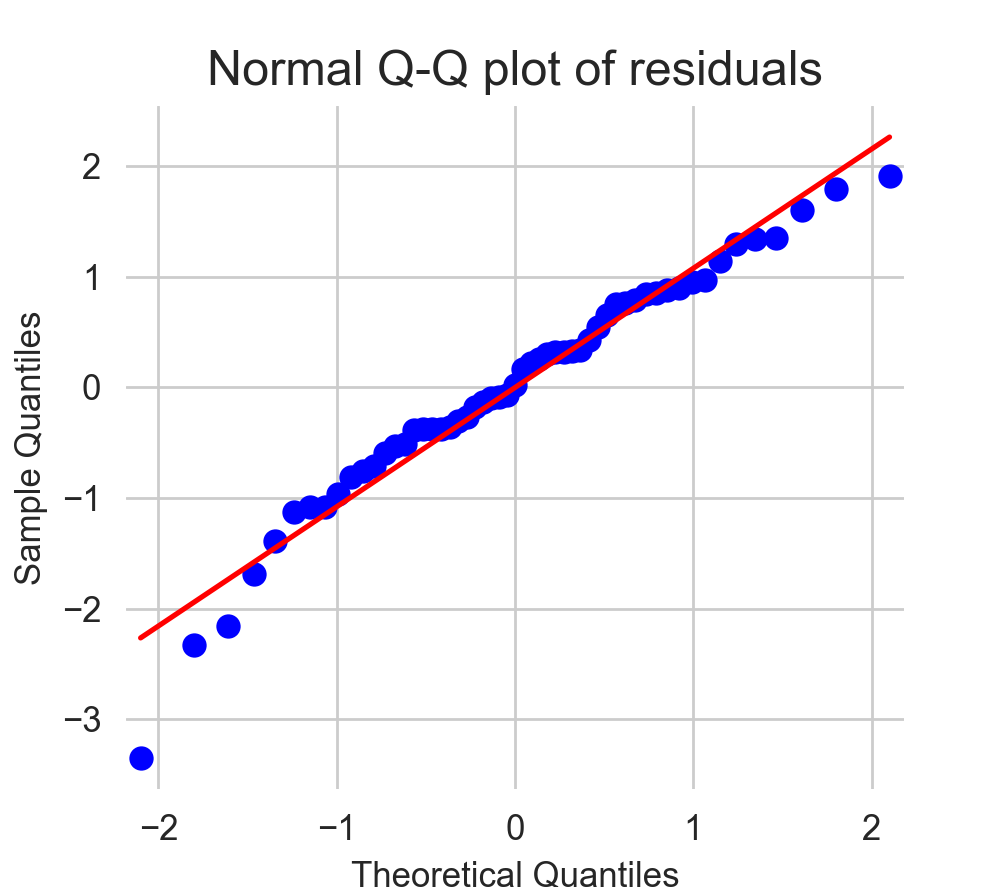

In [15]:
# Multivariate Normality
sns.set_style("whitegrid")
graphics.gofplots.qqplot(resids, line='r')
plt.title('Normal Q-Q plot of residuals', fontsize=14)
sns.despine(left=True, bottom=True)
plt.show()

<IPython.core.display.Javascript object>


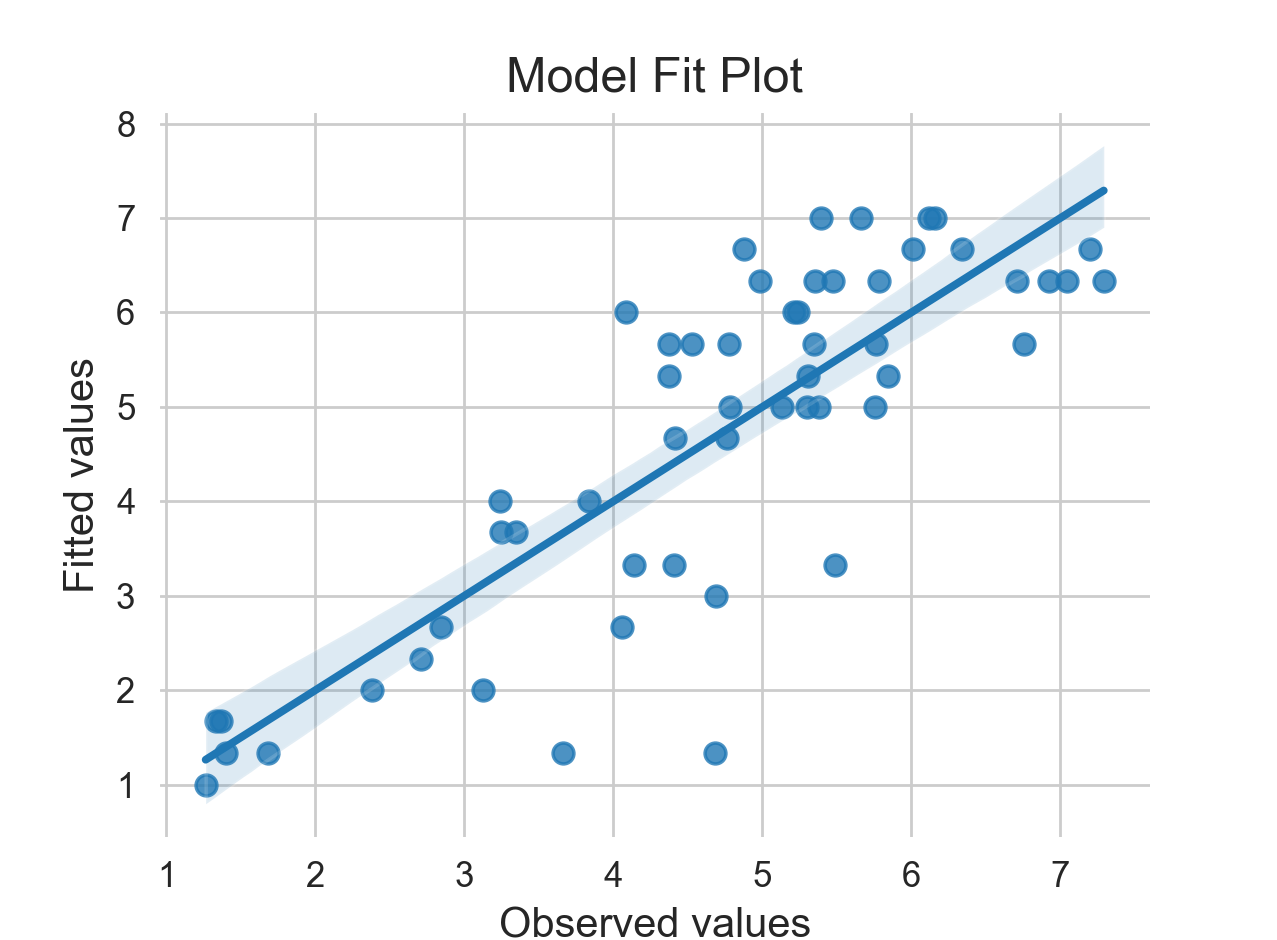

1.0629444713263518

In [14]:
# Model fit plot
sns.set_style("whitegrid")
sns.regplot(x=y_pred, y=df["avg_a11y_score"])
plt.xlabel('Observed values', fontsize=12)
plt.ylabel('Fitted values', fontsize=12)
plt.title('Model Fit Plot', fontsize=14)
sns.despine(left=True, bottom=True)
plt.show()

from sklearn.metrics import mean_squared_error
mean_squared_error(df["avg_a11y_score"], y_pred)

### References
- [Wobbrock, J.O. and Kay, M. (2016). Nonparametric statistics in human-computer interaction. Chapter 7 in J. Robertson & M.C. Kaptein (eds.), Modern Statistical Methods for HCI. Switzerland: Springer, pp. 135-170.](http://faculty.washington.edu/wobbrock/pubs/stats-16.pdf)
- [Seltman, Howard J. "Experimental design and analysis." (2012).](http://www.stat.cmu.edu/~hseltman/309/Book/Book.pdf)
- [Koji Yatani, Statistical Methods for HCI Research](https://yatani.jp/teaching/doku.php?id=hcistats:start)